In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyecharts import *
%matplotlib inline

In [39]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [180]:
yili_data = pd.read_csv(r'yili_tmall.csv')
meng_data = pd.read_csv(r'mengniu_tmall.csv')

In [181]:
yili_labels = ['金典', '安慕希', '谷粒多', '拜拜君', '味可滋', '舒化', 'QQ星', '畅意', '无菌砖', '奶粉', '优酸乳']
meng_labels = ['特仑苏', '纯甄', '新养道', '未来星', '甜小嗨', '奶特', '真果粒', '酸酸乳', '早餐奶', '奶特', '精选牧场', '谷粒']
yili_label_list = []
meng_label_list = []
for i in yili_data['商品名']:
    for j in yili_labels:
        if j in i:
            yili_label_list.append(j)
            break
    else:
        yili_label_list.append('伊利')
for i in meng_data['商品名']:
    for j in meng_labels:
        if j in i:
            meng_label_list.append(j)
            break
    else:
        meng_label_list.append('蒙牛')
yili_data['品牌'] = yili_label_list
meng_data['品牌'] = meng_label_list

In [182]:
yili_nums = []
for i in yili_data['商品名']:
    if '2箱' in i or '2包' in i or '2罐' in i or '2袋' in i or '2筒' in i:
        yili_nums.append(2)
    elif '4箱'  in i or '4包' in i  or '4罐' in i  or '4袋' in i or '4筒' in i:
        yili_nums.append(4)
    else:
        yili_nums.append(1)
meng_nums = []
for i in meng_data['商品名']:
    if '2箱' in i or '2提' in i or '+' in i:
        meng_nums.append(2)
    elif '4箱'  in i or '4提' in i:
        meng_nums.append(4)
    else:
        meng_nums.append(1)

In [183]:
yili_data['销售额'] = yili_data['价格'] * yili_data['销量']
meng_data['销售额'] = meng_data['价格'] * meng_data['销量']
yili_data['单件价格'] = yili_data['价格']/yili_nums
yili_data['按件销量'] = yili_data['销量']*yili_nums
meng_data['单件价格'] = meng_data['价格']/meng_nums
meng_data['按件销量'] = meng_data['销量']*meng_nums

In [184]:
yili_0813 = yili_data[yili_data['时间']=='2017-8-13']
meng_0813 = meng_data[meng_data['时间']=='2017-8-13']

In [185]:
yili_0813.describe()
meng_0813.describe()

,价格,销量,销售额,单件价格,按件销量
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000
mean,87.429630,9065.382716,7.341514e+05,58.288889,14554.345679
std,57.361133,17567.444562,1.493829e+06,44.460522,31110.536703
min,23.800000,102.000000,6.120000e+03,23.800000,102.000000
25%,49.000000,1426.000000,7.974400e+04,36.800000,1535.000000
50%,66.000000,3810.000000,3.133512e+05,50.000000,5071.000000
75%,120.000000,8731.000000,6.337760e+05,61.200000,14404.000000
max,409.000000,125662.000000,1.118392e+07,409.000000,251324.000000


,价格,销量,销售额,单件价格,按件销量
count,48.000000,48.000000,4.800000e+01,48.000000,48.000000
mean,58.256250,51026.770833,3.368446e+06,49.796875,58950.520833
std,25.174539,81136.815163,7.119250e+06,15.307537,88718.700442
min,28.000000,38.000000,1.744200e+03,26.400000,38.000000
25%,42.600000,8183.250000,3.630119e+05,39.900000,8726.750000
50%,50.000000,18448.500000,9.228000e+05,45.900000,18456.000000
75%,64.850000,66619.000000,3.794998e+06,59.850000,78563.500000
max,146.200000,479140.000000,4.743486e+07,99.000000,479140.000000


In [186]:
yili_price = yili_0813.sort_values(by='单件价格', ascending=False)
meng_price = meng_0813.sort_values(by='单件价格', ascending=False)
yili_sales_count = yili_0813.sort_values(by='按件销量', ascending=False)
meng_sales_count = meng_0813.sort_values(by='按件销量', ascending=False)
yili_sales_income = yili_0813.sort_values(by='销售额', ascending=False)
meng_sales_income = meng_0813.sort_values(by='销售额', ascending=False)

In [179]:
yili_price.head(10)
meng_price.head(10)

,时间,商品名,价格,销量,品牌,销售额,单件价格,按计销量,按件销量
0,2017-8-13,伊利暖哄哄女士生理期经期奶粉礼盒装 补铁配方 给她暖烘烘,409.0,133,奶粉,54397.0,409.0,133,133
17,2017-8-13,伊利直营 欣活成人奶粉中老年配方奶粉900g单听装罐装,126.0,930,奶粉,117180.0,126.0,930,930
1,2017-8-13,伊利直营欣活配方奶粉 中老年成人营养奶粉900g*2罐,252.0,3110,奶粉,783720.0,126.0,6220,6220
23,2017-8-13,伊利直营 果享学生奶粉学生粉900g单听装罐装,119.0,2121,奶粉,252399.0,119.0,2121,2121
2,2017-8-13,伊利新西兰进口全脂奶粉1kg*2包,196.0,2236,奶粉,438256.0,98.0,4472,4472
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,安慕希,5763560.0,88.0,65495,65495
3,2017-8-13,【伊利】【包邮】金典纯牛奶250ml*16盒2箱,173.4,951,金典,164903.4,86.7,1902,1902
4,2017-8-13,【包邮】伊利牛奶 拜拜君脱脂牛奶250ml*16*2箱,160.0,2263,拜拜君,362080.0,80.0,4526,4526
35,2017-8-13,伊利新西兰进口全脂奶粉1kg,79.0,1015,奶粉,80185.0,79.0,1015,1015
6,2017-8-13,【包邮】伊利 金典有机纯牛奶250ml*12*2箱,152.0,12302,金典,1869904.0,76.0,24604,24604


,时间,商品名,价格,销量,品牌,销售额,单件价格,按计销量,按件销量
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,纯甄,47434860.0,99.0,479140,479140
24,2017-8-13,蒙牛特仑苏纯牛奶250ml*16包 醇香新贵族 贵在优蛋白,81.7,91249,特仑苏,7455043.3,81.7,91249,91249
4,2017-8-13,蒙牛旗舰店 纯甄常温酸牛奶200g*16盒 好酸奶不添加 原味酸奶,75.9,1690,纯甄,128271.0,75.9,1690,1690
21,2017-8-13,蒙牛真果粒缤纷礼盒装250g*24包*2提 牛奶饮品,146.2,75237,真果粒,10999649.4,73.1,150474,150474
9,2017-8-13,蒙牛旗舰店 真果粒缤纷礼盒装250g*24包整箱 牛奶饮品,73.1,92380,真果粒,6752978.0,73.1,92380,92380
23,2017-8-13,蒙牛旗舰店 特仑苏有机奶250ml*12盒,68.4,36161,特仑苏,2473412.4,68.4,36161,36161
35,2017-8-13,蒙牛纯甄风味酸牛奶200g*12盒整箱 极限挑战定制版（形象随机）,66.0,34048,纯甄,2247168.0,66.0,34048,34048
37,2017-8-13,特仑苏纯牛奶250ml*12盒*2提,130.0,8445,特仑苏,1097850.0,65.0,16890,16890
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,130.0,64047,特仑苏,8326110.0,65.0,128094,128094
16,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒整箱,65.0,50730,特仑苏,3297450.0,65.0,50730,50730


In [187]:
yili_sales_count.head(10)
meng_sales_count.head(10)

,时间,商品名,价格,销量,品牌,销售额,单件价格,按件销量
30,2017-8-13,【包邮】伊利谷粒多燕麦牛奶200ml*12盒*2箱谷物早餐奶,89.0,125662,谷粒多,11183918.0,44.5,251324
37,2017-8-13,【包邮】伊利谷粒多红谷谷物牛奶红豆花生奶250ml*12盒*2箱,72.0,38738,谷粒多,2789136.0,36.0,77476
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,安慕希,5763560.0,88.0,65495
53,2017-8-13,【2件包邮】伊利牛奶 拜拜君 脱脂牛奶 250ml*16盒 0脂肪脱脂奶,59.9,62698,拜拜君,3755610.2,59.9,62698
36,2017-8-13,【包邮】伊利谷粒多黑谷谷物牛奶250ml*12*2箱,72.0,27848,谷粒多,2005056.0,36.0,55696
21,2017-8-13,【包邮】伊利 味可滋巧克力牛奶 早餐牛奶240ml*12盒*2箱,120.0,25957,味可滋,3114840.0,60.0,51914
7,2017-8-13,伊利官方直营 高锌高钙学生奶粉 400g*4袋,144.0,10602,奶粉,1526688.0,36.0,42408
43,2017-8-13,伊利安慕希原味酸奶205g*12*1箱,66.0,28817,安慕希,1901922.0,66.0,28817
9,2017-8-13,伊利女士高铁高钙奶粉4袋*400g,144.0,7147,奶粉,1029168.0,36.0,28588
14,2017-8-13,【包邮】伊利 中老年营养奶粉 成人奶粉400g*4袋,128.0,7121,奶粉,911488.0,32.0,28484


,时间,商品名,价格,销量,品牌,销售额,单件价格,按件销量
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,纯甄,47434860.0,99.0,479140
45,2017-8-13,蒙牛纯甄风味酸牛奶200g*6盒*2箱,56.0,148551,纯甄,8318856.0,28.0,297102
2,2017-8-13,蒙牛旗舰店 纯牛奶PURE MILK 250ml*16盒整箱,43.2,208309,蒙牛,8998948.8,43.2,208309
28,2017-8-13,蒙牛旗舰店 新养道零乳糖牛奶低脂型250ml*12盒整箱,36.9,185627,新养道,6849636.3,36.9,185627
21,2017-8-13,蒙牛真果粒缤纷礼盒装250g*24包*2提 牛奶饮品,146.2,75237,真果粒,10999649.4,73.1,150474
13,2017-8-13,蒙牛旗舰店 纯牛奶250ml*16盒整箱 早餐牛奶 好牛奶自然纯,43.2,133024,蒙牛,5746636.8,43.2,133024
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,130.0,64047,特仑苏,8326110.0,65.0,128094
46,2017-8-13,蒙牛旗舰店 早餐奶核桃味牛奶250ml*16盒整箱,41.9,127303,早餐奶,5333995.7,41.9,127303
27,2017-8-13,蒙牛旗舰店 早餐奶麦香味250ml*16盒整箱 原麦牛奶,43.9,112621,早餐奶,4944061.9,43.9,112621
32,2017-8-13,蒙牛旗舰店 特仑苏醇纤牛奶250ml*12盒整箱,57.8,101889,特仑苏,5889184.2,57.8,101889


In [188]:
yili_sales_income.head(10)
meng_sales_income.head(10)

,时间,商品名,价格,销量,品牌,销售额,单件价格,按件销量
30,2017-8-13,【包邮】伊利谷粒多燕麦牛奶200ml*12盒*2箱谷物早餐奶,89.0,125662,谷粒多,11183918.0,44.5,251324
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,安慕希,5763560.0,88.0,65495
53,2017-8-13,【2件包邮】伊利牛奶 拜拜君 脱脂牛奶 250ml*16盒 0脂肪脱脂奶,59.9,62698,拜拜君,3755610.2,59.9,62698
21,2017-8-13,【包邮】伊利 味可滋巧克力牛奶 早餐牛奶240ml*12盒*2箱,120.0,25957,味可滋,3114840.0,60.0,51914
37,2017-8-13,【包邮】伊利谷粒多红谷谷物牛奶红豆花生奶250ml*12盒*2箱,72.0,38738,谷粒多,2789136.0,36.0,77476
36,2017-8-13,【包邮】伊利谷粒多黑谷谷物牛奶250ml*12*2箱,72.0,27848,谷粒多,2005056.0,36.0,55696
43,2017-8-13,伊利安慕希原味酸奶205g*12*1箱,66.0,28817,安慕希,1901922.0,66.0,28817
6,2017-8-13,【包邮】伊利 金典有机纯牛奶250ml*12*2箱,152.0,12302,金典,1869904.0,76.0,24604
22,2017-8-13,【包邮】伊利味可滋香蕉牛奶240ml*12盒*2箱,120.0,13732,味可滋,1647840.0,60.0,27464
7,2017-8-13,伊利官方直营 高锌高钙学生奶粉 400g*4袋,144.0,10602,奶粉,1526688.0,36.0,42408


,时间,商品名,价格,销量,品牌,销售额,单件价格,按件销量
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,纯甄,47434860.0,99.0,479140
21,2017-8-13,蒙牛真果粒缤纷礼盒装250g*24包*2提 牛奶饮品,146.2,75237,真果粒,10999649.4,73.1,150474
2,2017-8-13,蒙牛旗舰店 纯牛奶PURE MILK 250ml*16盒整箱,43.2,208309,蒙牛,8998948.8,43.2,208309
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,130.0,64047,特仑苏,8326110.0,65.0,128094
45,2017-8-13,蒙牛纯甄风味酸牛奶200g*6盒*2箱,56.0,148551,纯甄,8318856.0,28.0,297102
24,2017-8-13,蒙牛特仑苏纯牛奶250ml*16包 醇香新贵族 贵在优蛋白,81.7,91249,特仑苏,7455043.3,81.7,91249
28,2017-8-13,蒙牛旗舰店 新养道零乳糖牛奶低脂型250ml*12盒整箱,36.9,185627,新养道,6849636.3,36.9,185627
9,2017-8-13,蒙牛旗舰店 真果粒缤纷礼盒装250g*24包整箱 牛奶饮品,73.1,92380,真果粒,6752978.0,73.1,92380
32,2017-8-13,蒙牛旗舰店 特仑苏醇纤牛奶250ml*12盒整箱,57.8,101889,特仑苏,5889184.2,57.8,101889
13,2017-8-13,蒙牛旗舰店 纯牛奶250ml*16盒整箱 早餐牛奶 好牛奶自然纯,43.2,133024,蒙牛,5746636.8,43.2,133024


In [108]:
yili_0813[yili_0813['品牌']=='金典']
yili_0813[yili_0813['品牌']=='安慕希']
meng_0813[meng_0813['品牌']=='特仑苏']
meng_0813[meng_0813['品牌']=='纯甄']

,时间,商品名,价格,销量,销售额,品牌
3,2017-8-13,【伊利】【包邮】金典纯牛奶250ml*16盒2箱,173.4,951,164903.4,金典
6,2017-8-13,【包邮】伊利 金典有机纯牛奶250ml*12*2箱,152.0,12302,1869904.0,金典
10,2017-8-13,伊利牛奶金典低脂调制乳250ml*12盒2箱装正品保证,136.0,497,67592.0,金典
38,2017-8-13,【伊利旗舰店】【2件包邮】伊利金典有机纯牛奶250ml*12盒/箱,68.4,14468,989611.2,金典
39,2017-8-13,【2件包邮】伊利 金典纯牛奶250ml*16*1箱 早餐奶,68.0,18281,1243108.0,金典
45,2017-8-13,【2件包邮】伊利 金典低脂调制乳牛奶250ml*12盒/箱,61.2,4188,256305.6,金典


,时间,商品名,价格,销量,销售额,品牌
29,2017-8-13,【包邮】伊利安慕希常温酸奶蓝莓味8*205g*2箱,92.8,11582,1074809.6,安慕希
31,2017-8-13,【包邮】安慕希常温酸奶香草味8*205g*2箱,88.0,7202,633776.0,安慕希
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,5763560.0,安慕希
43,2017-8-13,伊利安慕希原味酸奶205g*12*1箱,66.0,28817,1901922.0,安慕希
65,2017-8-13,伊利安慕希常温酸奶蓝莓味8*205g*1箱,46.4,2489,115489.6,安慕希
66,2017-8-13,安慕希常温酸奶香草味8*205g*1箱,44.0,1439,63316.0,安慕希


,时间,商品名,价格,销量,销售额,品牌
3,2017-8-13,蒙牛特仑苏纯牛奶250ml×8包整箱 醇香新贵族 贵在优蛋白,42.8,19390,829892.0,特仑苏
8,2017-8-13,蒙牛旗舰店 特仑苏低脂牛奶250ml*12盒,61.2,27686,1694383.2,特仑苏
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,130.0,64047,8326110.0,特仑苏
16,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒整箱,65.0,50730,3297450.0,特仑苏
23,2017-8-13,蒙牛旗舰店 特仑苏有机奶250ml*12盒,68.4,36161,2473412.4,特仑苏
24,2017-8-13,蒙牛特仑苏纯牛奶250ml*16包 醇香新贵族 贵在优蛋白,81.7,91249,7455043.3,特仑苏
32,2017-8-13,蒙牛旗舰店 特仑苏醇纤牛奶250ml*12盒整箱,57.8,101889,5889184.2,特仑苏
34,2017-8-13,特仑苏纯牛奶250ml*8盒*2提 共16盒,85.6,18599,1592074.4,特仑苏
37,2017-8-13,特仑苏纯牛奶250ml*12盒*2提,130.0,8445,1097850.0,特仑苏
40,2017-8-13,蒙牛特仑苏低脂牛奶250ml*12盒,61.2,51012,3121934.4,特仑苏


,时间,商品名,价格,销量,销售额,品牌
4,2017-8-13,蒙牛旗舰店 纯甄常温酸牛奶200g*16盒 好酸奶不添加 原味酸奶,75.9,1690,128271.0,纯甄
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,47434860.0,纯甄
18,2017-8-13,【变5定制】蒙牛纯甄风味酸牛奶200g*12盒整箱 经典原味酸奶,59.4,472,28036.8,纯甄
22,2017-8-13,蒙牛旗舰店 纯甄风味酸牛奶200g*6包,28.0,2704,75712.0,纯甄
31,2017-8-13,蒙牛旗舰店 纯甄风味酸牛奶200g*6包*2箱,52.8,4363,230366.4,纯甄
35,2017-8-13,蒙牛纯甄风味酸牛奶200g*12盒整箱 极限挑战定制版（形象随机）,66.0,34048,2247168.0,纯甄
45,2017-8-13,蒙牛纯甄风味酸牛奶200g*6盒*2箱,56.0,148551,8318856.0,纯甄


In [189]:
yili_0813.groupby('品牌').sum().sort_values(by='销售额', ascending=False)
meng_0813.groupby('品牌').sum().sort_values(by='销售额', ascending=False)

,价格,销量,销售额,单件价格,按件销量
品牌,,,,,
谷粒多,502.0,241007,18338839.0,336.0,438870
安慕希,425.2,117024,9552873.2,334.8,135808
奶粉,2891.0,67309,8354301.2,1684.2,209051
味可滋,900.0,54136,5758320.0,600.0,95972
金典,659.0,50687,4591424.2,428.3,64437
拜拜君,279.8,68831,4349503.2,199.8,71094
舒化,712.8,43910,3912427.2,475.2,69074
QQ星,343.6,42068,1942897.4,343.6,42068
无菌砖,112.8,27084,1385224.8,112.8,27084


,价格,销量,销售额,单件价格,按件销量
品牌,,,,,
纯甄,437.1,670968,58463270.2,382.70,823882
特仑苏,783.7,469208,35777333.9,610.90,560299
真果粒,294.9,192696,18700613.6,221.80,267933
蒙牛,238.5,423290,18562290.3,238.50,423290
早餐奶,127.7,285767,12198879.3,127.70,285767
新养道,197.7,202610,7557184.5,156.75,202854
谷粒,242.4,86308,4790980.8,177.60,147162
奶特,150.0,54742,2737100.0,150.00,54742
甜小嗨,152.7,23285,1184115.5,152.70,23285


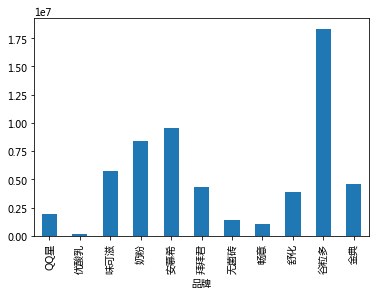

In [122]:
yili_0813.groupby('品牌').销售额.sum().plot(kind='bar')

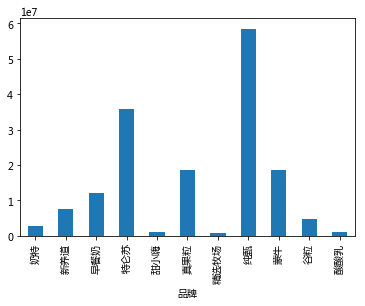

In [123]:
meng_0813.groupby('品牌').销售额.sum().plot(kind='bar')

In [190]:
yili_0813.groupby('品牌').sum().sort_values(by='按件销量', ascending=False)
meng_0813.groupby('品牌').sum().sort_values(by='按件销量', ascending=False)

,价格,销量,销售额,单件价格,按件销量
品牌,,,,,
谷粒多,502.0,241007,18338839.0,336.0,438870
奶粉,2891.0,67309,8354301.2,1684.2,209051
安慕希,425.2,117024,9552873.2,334.8,135808
味可滋,900.0,54136,5758320.0,600.0,95972
拜拜君,279.8,68831,4349503.2,199.8,71094
舒化,712.8,43910,3912427.2,475.2,69074
金典,659.0,50687,4591424.2,428.3,64437
QQ星,343.6,42068,1942897.4,343.6,42068
无菌砖,112.8,27084,1385224.8,112.8,27084


,价格,销量,销售额,单件价格,按件销量
品牌,,,,,
纯甄,437.1,670968,58463270.2,382.70,823882
特仑苏,783.7,469208,35777333.9,610.90,560299
蒙牛,238.5,423290,18562290.3,238.50,423290
早餐奶,127.7,285767,12198879.3,127.70,285767
真果粒,294.9,192696,18700613.6,221.80,267933
新养道,197.7,202610,7557184.5,156.75,202854
谷粒,242.4,86308,4790980.8,177.60,147162
奶特,150.0,54742,2737100.0,150.00,54742
酸酸乳,79.8,23540,939246.0,79.80,23540


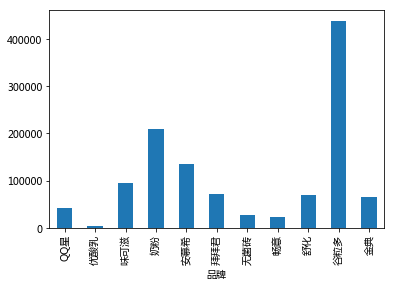

In [191]:
yili_0813.groupby('品牌').按件销量.sum().plot(kind='bar')

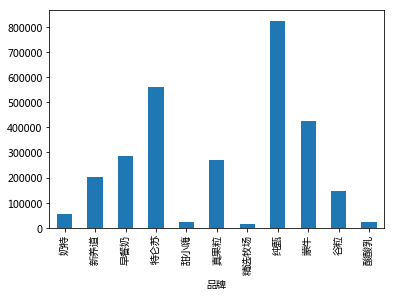

In [192]:
meng_0813.groupby('品牌').按件销量.sum().plot(kind='bar')